In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import missingno as msno


In [7]:
banking = pd.read_csv('banking_dirty.csv')
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


# 1. Uniformity
Stellar work on chapter 2! You're now an expert at handling categorical and text variables.

2. In this chapter
In this chapter, we're looking at more advanced data cleaning problems, such as uniformity, cross field validation and dealing with missing data.

3. Data range constraints
In chapter 1, we saw how out of range values are a common problem when cleaning data, and that when left untouched, can skew your analysis.

4. Uniformity
In this lesson, we're going to tackle a problem that could similarly skew our data, which is unit uniformity. For example, we can have temperature data that has values in both Fahrenheit and Celsius, weight data in Kilograms and in stones, dates in multiple formats, and so on. Verifying unit uniformity is imperative to having accurate analysis.

5. An example
Here's a dataset with average temperature data throughout the month of March in New York City. The dataset was collected from different sources with temperature data in Celsius and Fahrenheit merged together. We can see that unless a major climate event occurred,

6. An example
this value here is most likely Fahrenheit, not Celsius. Let's confirm the presence of these values visually.

7. An example
We can do so by plotting a scatter plot of our data. We can do this using matplotlib.pyplot, which was imported as plt. We use the plt dot scatter function, which takes in what to plot on the x axis, the y axis, and which data source to use. We set the title, axis labels with the helper functions seen here, show the plot with plt dot show,

8. Insert title here...
and voila.

9. Insert title here...
Notice these values here? They all must be fahrenheit.

10. Treating temperature data
A simple web search returns the formula for converting Fahrenheit to Celsius. To convert our temperature data, we isolate all rows of temperature column where it is above 40 using the loc method. We chose 40 because it's a common sense maximum for Celsius temperatures in New York City. We then convert these values to Celsius using the formula above, and reassign them to their respective Fahrenheit values in temperatures. We can make sure that our conversion was correct with an assert statement, by making sure the maximum value of temperature is less than 40.

11. Treating date data
Here's another common uniformity problem with date data. This is a DataFrame called birthdays containing birth dates for a variety of individuals. It has been collected from a variety of sources and merged into one.

12. Treating date data
Notice the dates here? The one in blue has the month, day, year format, whereas the one in orange has the month written out. The one in red is obviously an error, with what looks like a day day year format. We'll learn how to deal with that one as well.

13. Datetime formatting
We already discussed datetime objects. Without getting too much into detail, datetime accepts different formats that help you format your dates as pleased. The pandas to datetime function automatically accepts most date formats, but could raise errors when certain formats are unrecognizable. You don't have to memorize these formats, just know that they exist and are easily searchable!

14. Treating date data
You can treat these date inconsistencies easily by converting your date column to datetime. We can do this in pandas with the to_datetime function. However this isn't enough and will most likely return an error, since we have dates in multiple formats, especially the weird day/day/format which triggers an error with months. Instead we set the infer_datetime_format argument to True, and set errors equal to coerce. This will infer the format and return missing value for dates that couldn't be identified and converted instead of a value error.

15. Treating date data
This returns the birthday column with aligned formats, with the initial ambiguous format of day day year, being set to NAT, which represents missing values in Pandas for datetime objects.

16. Treating date data
We can also convert the format of a datetime column using the dt dot strftime method, which accepts a datetime format of your choice. For example, here we convert the Birthday column to day month year, instead of year month day.

17. Treating ambiguous date data
However a common problem is having ambiguous dates with vague formats. For example, is this date value set in March or August? Unfortunately there's no clear cut way to spot this inconsistency or to treat it. Depending on the size of the dataset and suspected ambiguities, we can either convert these dates to NAs and deal with them accordingly. If you have additional context on the source of your data, you can probably infer the format. If the majority of subsequent or previous data is of one format, you can probably infer the format as well. All in all, it is essential to properly understand where your data comes from, before trying to treat it, as it will make making these decisions much easier.

18. Let's practice!
Now let's make our data uniform

# Uniform currencies
In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts (acct_amount), their currency (acct_cur), amount invested (inv_amount), account opening date (account_opened), and last transaction date (last_transaction) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

Instructions
0 XP
Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.
Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.

In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

# Uniform dates
After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.

In [6]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')  

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0   2018-02-09
1   2019-02-28
2   2018-04-25
3   2017-07-11
4   2018-05-14
Name: account_opened, dtype: datetime64[ns]
0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


# 1. Cross field validation
Hi and welcome to the second lesson of this chapter! In this lesson we'll talk about cross field validation for diagnosing dirty data.

2. Motivation
Let's take a look at the following dataset. It contains flight statistics on the total number of passengers in economy, business and first class as well as the total passengers for each flight. We know that these columns have been collected and merged from different data sources, and a common challenge when merging data from different sources is data integrity, or more broadly making sure that our data is correct.

3. Cross field validation
This is where cross field validation comes in. Cross field validation is the use of multiple fields in your dataset to sanity check the integrity of your data. For example in our flights dataset, this could be summing economy, business and first class values and making sure they are equal to the total passengers on the plane. This could be easily done in Pandas, by first subsetting on the columns to sum, then using the sum method with the axis argument set to 1 to indicate row wise summing. We then find instances where the total passengers column is equal to the sum of the classes. And find and filter out instances of inconsistent passenger amounts by subsetting on the equality we created with brackets and the tilde symbol.

4. Cross field validation
Here's another example containing user IDs, birthdays and age values for a set of users. We can for example make sure that the age and birthday columns are correct by subtracting the number of years between today's date and each birthday.

5. Cross field validation
We can do this by first making sure the Birthday column is converted to datetime with the pandas to datetime function. We then create an object storing today's date using the datetime package's date dot today function. We then calculate the difference in years between today's date's year, and the year of each birthday by using the dot dt dot year attribute of the user's Birthday column. We then find instances where the calculated ages are equal to the actual age column in the users DataFrame. We then find and filter out the instances where we have inconsistencies using subsetting with brackets and the tilde symbol on the equality we created.

6. What to do when we catch inconsistencies?
So what should be the course of action in case we spot inconsistencies with cross-field validation? Just like other data cleaning problems, there is no one size fits all solution, as often the best solution requires an in depth understanding of our dataset. We can decide to either drop inconsistent data, set it to missing and impute it, or apply some rules due to domain knowledge. All these routes and assumptions can be decided upon only when you have a good understanding of where your dataset comes from and the different sources feeding into it.

7. Let's practice!
Now that you know about cross field validation, let's get to practice!

# How's our data integrity?
New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.

Instructions 1/2
0 XP
1
Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.
Store the values of banking with consistent inv_amount in consistent_inv, and those with inconsistent ones in inconsistent_inv.

Store today's date into today, and manually calculate customers' ages and store them in ages_manual.
Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.

In [11]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [30]:
print(banking.info)

<bound method DataFrame.info of     Unnamed: 0   cust_id birth_date        Age  acct_amount  inv_amount  \
0            0  870A9281 1962-06-09 1962-06-09     63523.31       51295   
1            1  166B05B0 1962-12-16 1962-12-16     38175.46       15050   
2            2  BFC13E88 1990-09-12 1990-09-12     59863.77       24567   
3            3  F2158F66 1985-11-03 1985-11-03     84132.10       23712   
4            4  7A73F334 1990-05-17 1990-05-17    120512.00       93230   
..         ...       ...        ...        ...          ...         ...   
95          95  CA507BA1 1974-08-10 1974-08-10     12209.84        7515   
96          96  B99CD662 1989-12-12 1989-12-12     92838.44       49089   
97          97  13770971 1984-11-29 1984-11-29     92750.87       27962   
98          98  93E78DA3 1969-12-14 1969-12-14     41942.23       29662   
99          99  AC91D689 1993-05-18 1993-05-18     99490.61       32149   

     fund_A   fund_B   fund_C   fund_D account_opened last_transact

In [28]:
#
banking['birth_date'] = pd.to_datetime(banking['birth_date'])

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])
# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])
print("Number of consistent ages: ", consistent_ages.shape[0])
banking['Age'] = banking['birth_date']


# Find rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])
# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])
print("Number of consistent ages: ", consistent_ages.shape[0])

Number of inconsistent ages:  100
Number of inconsistent ages:  100
Number of consistent ages:  0
Number of inconsistent ages:  100
Number of inconsistent ages:  100
Number of consistent ages:  0


# Missing investors
Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

Instructions 1/4
1 XP
1
2
3
4
Print the number of missing values by column in the banking DataFrame.
Plot and show the missingness matrix of banking with the msno.matrix() function.

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


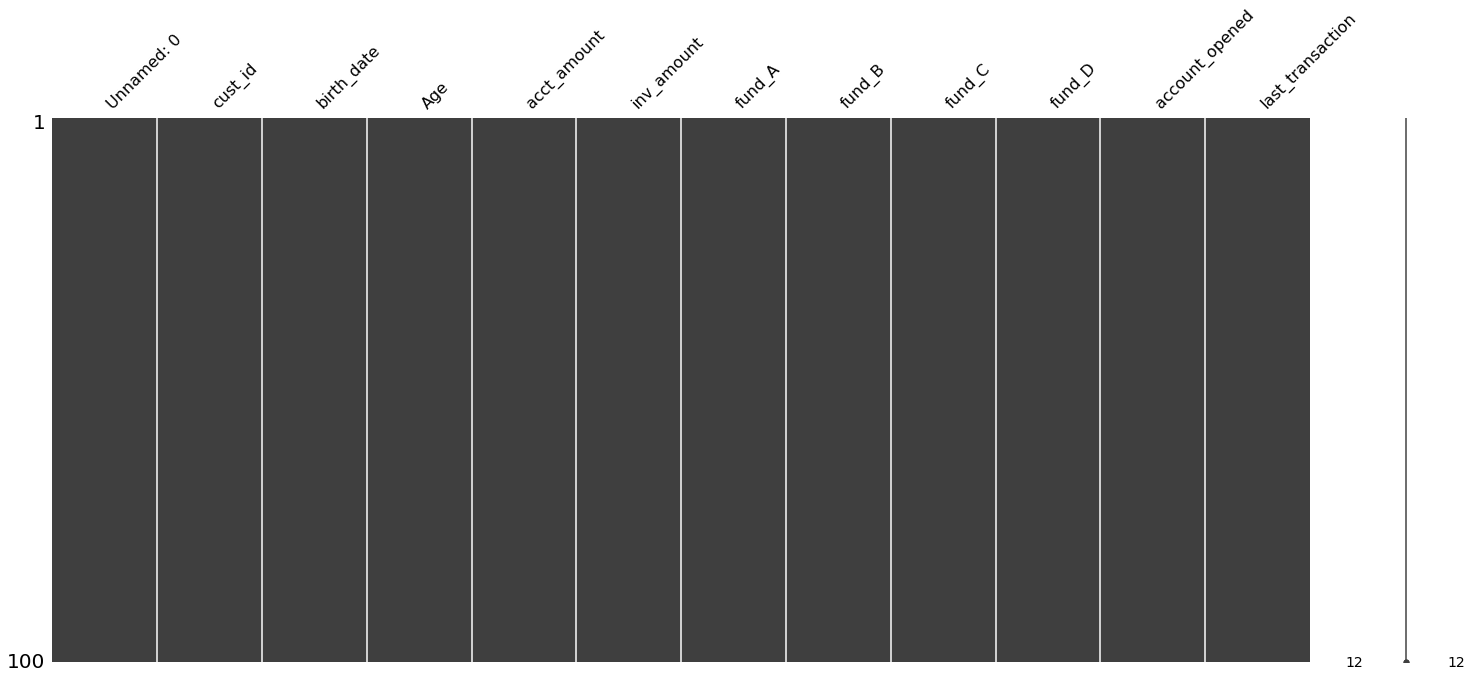

In [20]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()